# Import Libraries For Data Pre-Processing

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns

# Get Data

In [ ]:
#Get data
#Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import .csv from drive
ck = pd.read_csv('/content/gdrive/MyDrive/python/Ad Click Data.csv')

# Basic Data Representation

In [ ]:
#determine the number of record and attribute
r = str(ck.shape[0]) #0 is record
a = str(ck.shape[1]) #1 is attribute
print('Record = '+r+", attribute = "+a)
#show data sample
ck.head(0)

Record = 1000, attribute = 10


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


In [ ]:
#number of unique values for each attribute
ck.nunique()

Daily Time Spent on Site     890
Age                           43
Area Income                  987
Daily Internet Usage         955
Ad Topic Line               1000
City                         968
Male                           2
Country                      237
Timestamp                    997
Clicked on Ad                  2
dtype: int64

In [ ]:
#provide more detail
ck.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [ ]:
#check if the record has null value and identify type of each attribute
ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


# Data Pre-Processing

In [ ]:
#change attribute name of Male to Gender but still remain the meaning that 0 = female and 1 = male
ck.rename(columns= {'Male':'Gender'},inplace = True)

In [ ]:
ck.head(0)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad


In [ ]:
#and from the table above we have discussed and decide to cut off Daily time spent on Site
ck = ck.drop(['Daily Time Spent on Site', 'Ad Topic Line', 'Timestamp', 'City','Country'], axis = 1)
ck.head(1)

,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
0,35,61833.9,256.09,0.0,0


For better Classification, we will transform some Attribute in to group type e.g. Age into Age Group and Area income to level of income

In [ ]:
#start ny creating new data frame to append with the original file
from numpy import *
newatr = pd.DataFrame(index=arange(ck.shape[0]),columns='Age_Group Income_Group Internet_Usage_Amount'.split())
newatr.head()

,Age_Group,Income_Group,Internet_Usage_Amount
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
#create class for each group in a list
age_c = ['1','2','3']
income_c = ['1','2','3']
iu_c = ['1','2','3']

In [ ]:
#start by classify Age into Age_Group
i = 0
while i < (ck.shape[0]):
  if (ck.loc[i, 'Age']) < 31:
    newatr.loc[i, 'Age_Group']  = age_c[0]
  elif 30 < (ck.loc[i, 'Age']) < 39:
    newatr.loc[i, 'Age_Group']  = age_c[1]
  else: newatr.loc[i, 'Age_Group']  = age_c[2]
  i = i + 1

In [ ]:
#followed by classify Area Income into Income_Group
i = 0
while i < (ck.shape[0]):
  if (ck.loc[i, 'Area Income']) < 51000:
    newatr.loc[i, 'Income_Group']  = income_c[0]
  elif 50999 < (ck.loc[i, 'Area Income']) < 62900:
    newatr.loc[i, 'Income_Group']  = income_c[1]
  else: newatr.loc[i, 'Income_Group']  = income_c[2]
  i = i + 1

In [ ]:
#And the last one, Daily Internet Usage into Internet_Usage_Amount
i = 0
while i < (ck.shape[0]):
  if (ck.loc[i, 'Daily Internet Usage']) < 153:
    newatr.loc[i, 'Internet_Usage_Amount']  = iu_c[0]
  elif 152 < (ck.loc[i, 'Daily Internet Usage']) < 209:
    newatr.loc[i, 'Internet_Usage_Amount']  = iu_c[1]
  else: newatr.loc[i, 'Internet_Usage_Amount']  = iu_c[2]
  i = i + 1

In [ ]:
#check the result
newatr

,Age_Group,Income_Group,Internet_Usage_Amount
0,2,2,3
1,2,3,2
2,1,2,3
3,1,2,3
4,2,3,3
...,...,...,...
995,1,3,2
996,3,3,1
997,3,1,1
998,1,1,2


In [ ]:
#Append the classified dataframe to existing dataframe
ck = ck.join(newatr)

In [ ]:
#set index for the dataframe
newidx = pd.DataFrame(index=arange(ck.shape[0]), columns='No.'.split())
#insert number to each record of 'No.' attribute
k,l = 0,1
while k < (ck.shape[0]):
  newidx.loc[k, 'No.']  = l
  k = k + 1
  l = l + 1
#join with previous dataframe
ck = ck.join(newidx)

In [ ]:
#last check of the data before perform drop
ck

,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Age_Group,Income_Group,Internet_Usage_Amount,No.
0,35,61833.90,256.09,0.0,0,2,2,3,1
1,31,68441.85,193.77,1.0,0,2,3,2,2
2,26,59785.94,236.50,0.0,0,1,2,3,3
3,29,54806.18,245.89,1.0,0,1,2,3,4
4,35,73889.99,225.58,0.0,0,2,3,3,5
...,...,...,...,...,...,...,...,...,...
995,30,71384.57,208.58,1.0,1,1,3,2,996
996,45,67782.17,134.42,1.0,1,3,3,1,997
997,51,42415.72,120.37,1.0,1,3,1,1,998
998,19,41920.79,187.95,0.0,0,1,1,2,999


In [ ]:
#We can see that there is a null in the previous ck.info() so we will dropped the Record containing null
nck = ck.dropna(axis = 0)
print('Remained record after drop is ', nck.shape[0])

Remained record after drop is  975


In [ ]:
#set index
nck.set_index('No.')
nck.head(1)

,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Age_Group,Income_Group,Internet_Usage_Amount,No.
0,35,61833.9,256.09,0.0,0,2,2,3,1


In [ ]:
#change gender type from float to str
nck.Gender = nck.Gender.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
nck.head(10)

,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Age_Group,Income_Group,Internet_Usage_Amount,No.
0,35,61833.90,256.09,0,0,2,2,3,1
1,31,68441.85,193.77,1,0,2,3,2,2
2,26,59785.94,236.50,0,0,1,2,3,3
3,29,54806.18,245.89,1,0,1,2,3,4
4,35,73889.99,225.58,0,0,2,3,3,5
5,23,59761.56,226.74,1,0,1,2,3,6
6,33,53852.85,208.36,0,0,2,2,2,7
7,48,24593.33,131.76,1,1,3,1,1,8
8,30,68862.00,221.51,1,0,1,3,3,9
9,20,55642.32,183.82,1,0,1,2,2,10


In [ ]:
#set variable for corelation
co = nck.corr()

In [ ]:
%matplotlib inline
#to show the graph
import seaborn as sns  #import seaborn library for heatmap
import matplotlib.pyplot as plt #import plot function

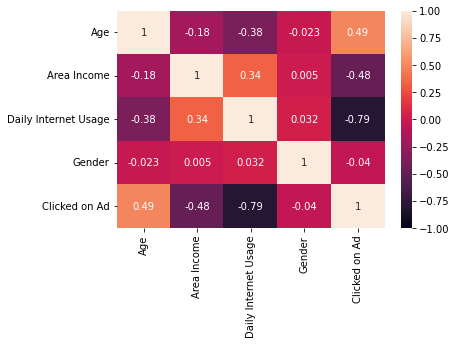

In [ ]:
sns.heatmap(co, vmin=-1, vmax=1, annot=True)
plt.show()

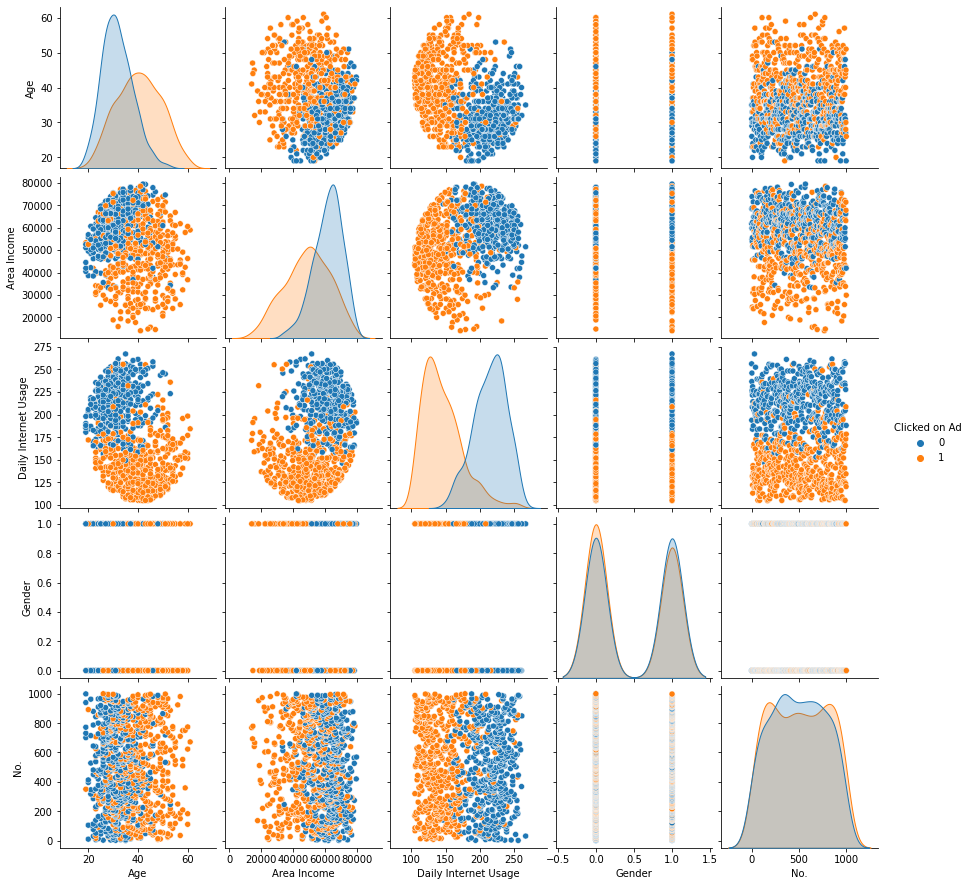

In [ ]:
sns.pairplot(nck, hue = 'Clicked on Ad')

# Descriptive Analysis

In [ ]:
#show the number of People who click and did not click on ad
print('Number of people who clicked on ad is ',len(nck[(nck['Clicked on Ad'] > 0)]))
print('Number of people who did not clicked on ad is ',len(nck[(nck['Clicked on Ad'] < 1)]))

Number of people who clicked on ad is  490
Number of people who did not clicked on ad is  485


In [ ]:
age_y = len(nck[nck['Age_Group']=='1'])
age_a = len(nck[nck['Age_Group']=='2'])
age_e = len(nck[nck['Age_Group']=='3'])
click1= len(nck[(nck['Age_Group']=='1') & (nck['Clicked on Ad']==1)])
click2= len(nck[(nck['Age_Group']=='2') & (nck['Clicked on Ad']==1)])
click3= len(nck[(nck['Age_Group']=='3') & (nck['Clicked on Ad']==1)])
print('From Age group, The number of people in each class are:')
print(' Youth = ',age_y ,'people, ',click1 ,' people clicked and',age_y-click1,'people not clicked' )
print(' Adult = ',age_a ,'people, ',click2 ,' people clicked and',age_a-click2,'people not clicked' )
print(' Elder = ',age_e ,'people, ',click3 ,' people clicked and',age_e-click3,'people not clicked' )

From Age group, The number of people in each class are:
 Youth =  295 people,  80  people clicked and 215 people not clicked
 Adult =  331 people,  131  people clicked and 200 people not clicked
 Elder =  349 people,  279  people clicked and 70 people not clicked


In [ ]:
income_y = len(nck[nck['Income_Group']=='1'])
income_a = len(nck[nck['Income_Group']=='2'])
income_e = len(nck[nck['Income_Group']=='3'])
click1= len(nck[(nck['Income_Group']=='1') & (nck['Clicked on Ad']==1)])
click2= len(nck[(nck['Income_Group']=='2') & (nck['Clicked on Ad']==1)])
click3= len(nck[(nck['Income_Group']=='3') & (nck['Clicked on Ad']==1)])
print('From Income group, The number of people in each class are:')
print(' Low = ',income_y ,'people, ',click1 ,' people clicked and',income_y-click1,'people not clicked' )
print(' Medium = ',income_a ,'people, ',click2 ,' people clicked and',income_a-click2,'people not clicked' )
print(' High = ',income_e ,'people, ',click3 ,' people clicked and',income_e-click3,'people not clicked' )

From Income group, The number of people in each class are:
 Low =  327 people,  266  people clicked and 61 people not clicked
 Medium =  328 people,  137  people clicked and 191 people not clicked
 High =  320 people,  87  people clicked and 233 people not clicked


In [ ]:
itu_y = len(nck[nck['Internet_Usage_Amount']=='1'])
itu_a = len(nck[nck['Internet_Usage_Amount']=='2'])
itu_e = len(nck[nck['Internet_Usage_Amount']=='3'])
click1= len(nck[(nck['Internet_Usage_Amount']=='1') & (nck['Clicked on Ad']==1)])
click2= len(nck[(nck['Internet_Usage_Amount']=='2') & (nck['Clicked on Ad']==1)])
click3= len(nck[(nck['Internet_Usage_Amount']=='3') & (nck['Clicked on Ad']==1)])
print('From Internet usage group, The number of people in each class are:')
print(' Low = ',itu_y ,'people, ',click1 ,' people clicked and',itu_y-click1,'people not clicked' )
print(' Medium = ',itu_a ,'people, ',click2 ,' people clicked and',itu_a-click2,'people not clicked' )
print(' High = ',itu_e ,'people, ',click3 ,' people clicked and',itu_e-click3,'people not clicked' )

From Internet usage group, The number of people in each class are:
 Low =  330 people,  328  people clicked and 2 people not clicked
 Medium =  328 people,  145  people clicked and 183 people not clicked
 High =  317 people,  17  people clicked and 300 people not clicked


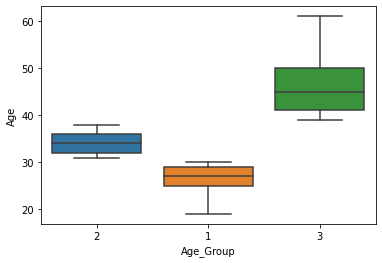

In [ ]:
sns.boxplot(data = nck, x = 'Age_Group', y = 'Age')

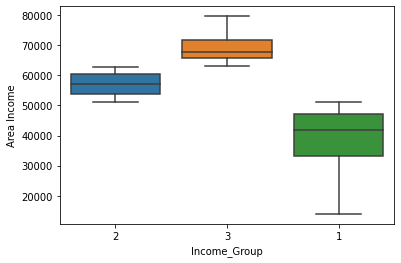

In [ ]:
sns.boxplot(data = nck, x = 'Income_Group', y = 'Area Income')

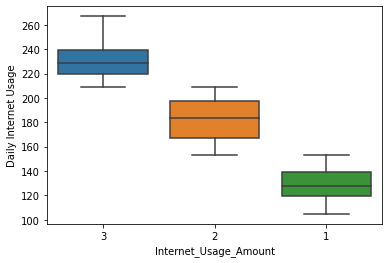

In [ ]:
sns.boxplot(data = nck, x = 'Internet_Usage_Amount', y = 'Daily Internet Usage')

# Import Tools for Model Creation

In [ ]:
#for decision tree
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #import train test spilt function
from sklearn import metrics #import metric for accuracy calculation
from sklearn.tree import export_graphviz #import graph tool from SciKit library
from six import StringIO
from IPython.display import Image
import pydotplus
#for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
#for Hist Gradient Boosting Classifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
#for cofusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


# Decision Tree Model



Decision Tree 1

In [ ]:
#Set feature and target variable
fs1 = ['Gender','Area Income','Daily Internet Usage'] #select attribute to use
X1 = nck[fs1]  #set feature
Y1 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train1 , X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [ ]:
#decision tree variable
tre1 = DecisionTreeClassifier(max_depth=4)
# give train set to decision tree by 'fit' fuction

tre1 = tre1.fit(X_train1,Y_train1)
#give test set to decision tree by 'predict' fuction
test_r1 = tre1.predict(X_test1)

# show how accurate was the model
print("Accuracy:",metrics.accuracy_score(Y_test1, test_r1))

Accuracy: 0.9044368600682594


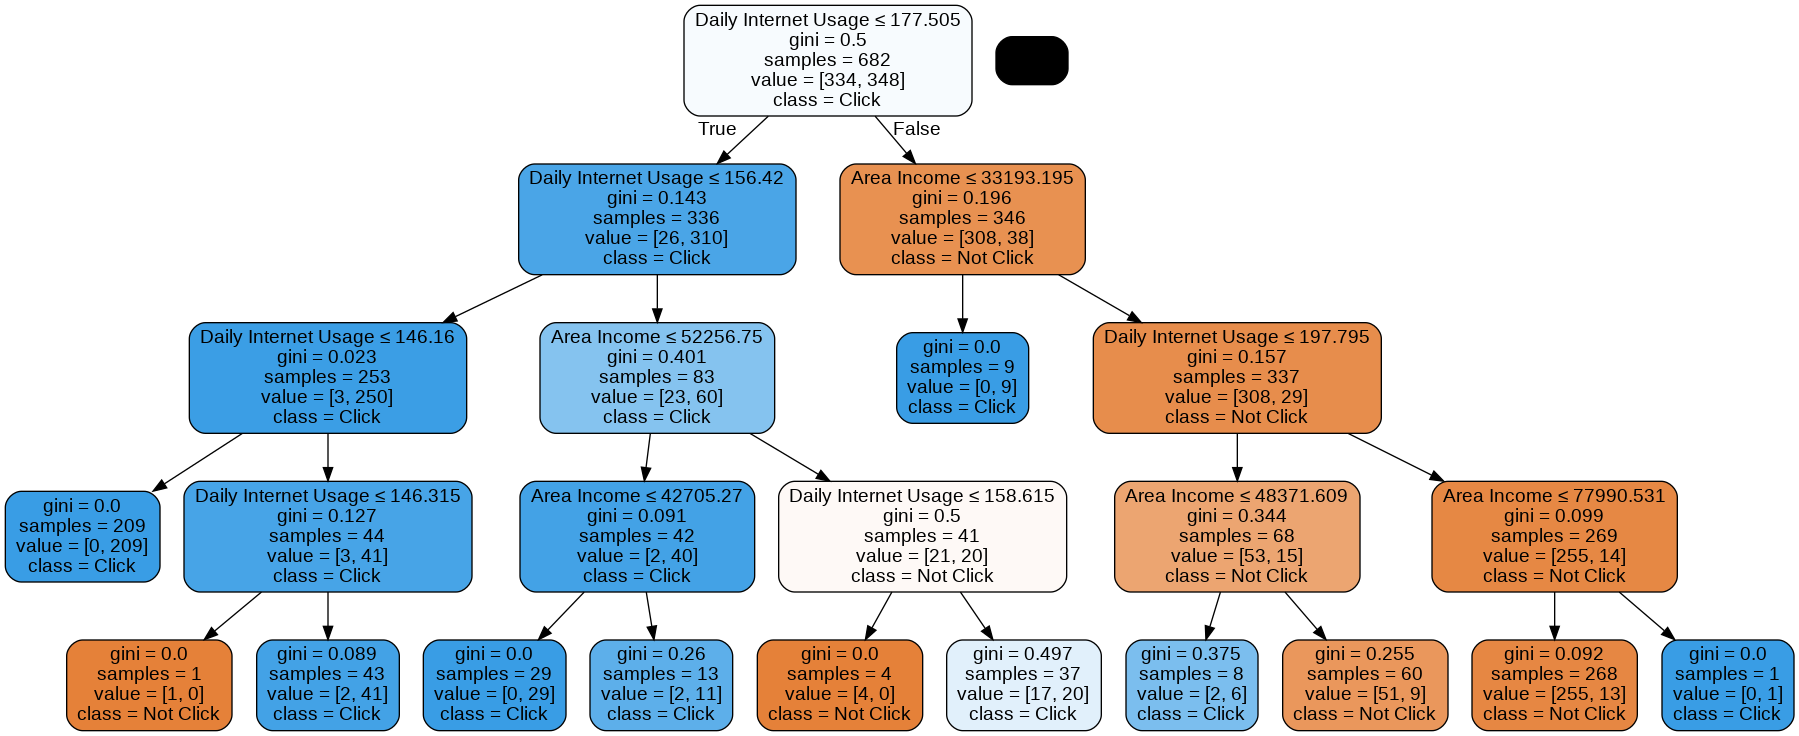

In [ ]:
dot_data = StringIO()
export_graphviz(tre1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = fs1 ,class_names=['Not Click','Click'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Decision Tree 2

In [ ]:
#Set feature and target variable
fs2 = ['Age','Area Income','Daily Internet Usage'] #select attribute to use
X2 = nck[fs2]  #set feature
Y2 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train2 , X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [ ]:
#decision tree variable
tre2 = DecisionTreeClassifier(max_depth=4)
# give train set to decision tree by 'fit' fuction

tre2 = tre2.fit(X_train2,Y_train2)
#give test set to decision tree by 'predict' fuction
test_r2 = tre2.predict(X_test2)

# show how accurate was the model
print("Accuracy:",metrics.accuracy_score(Y_test2, test_r2))

Accuracy: 0.9180887372013652


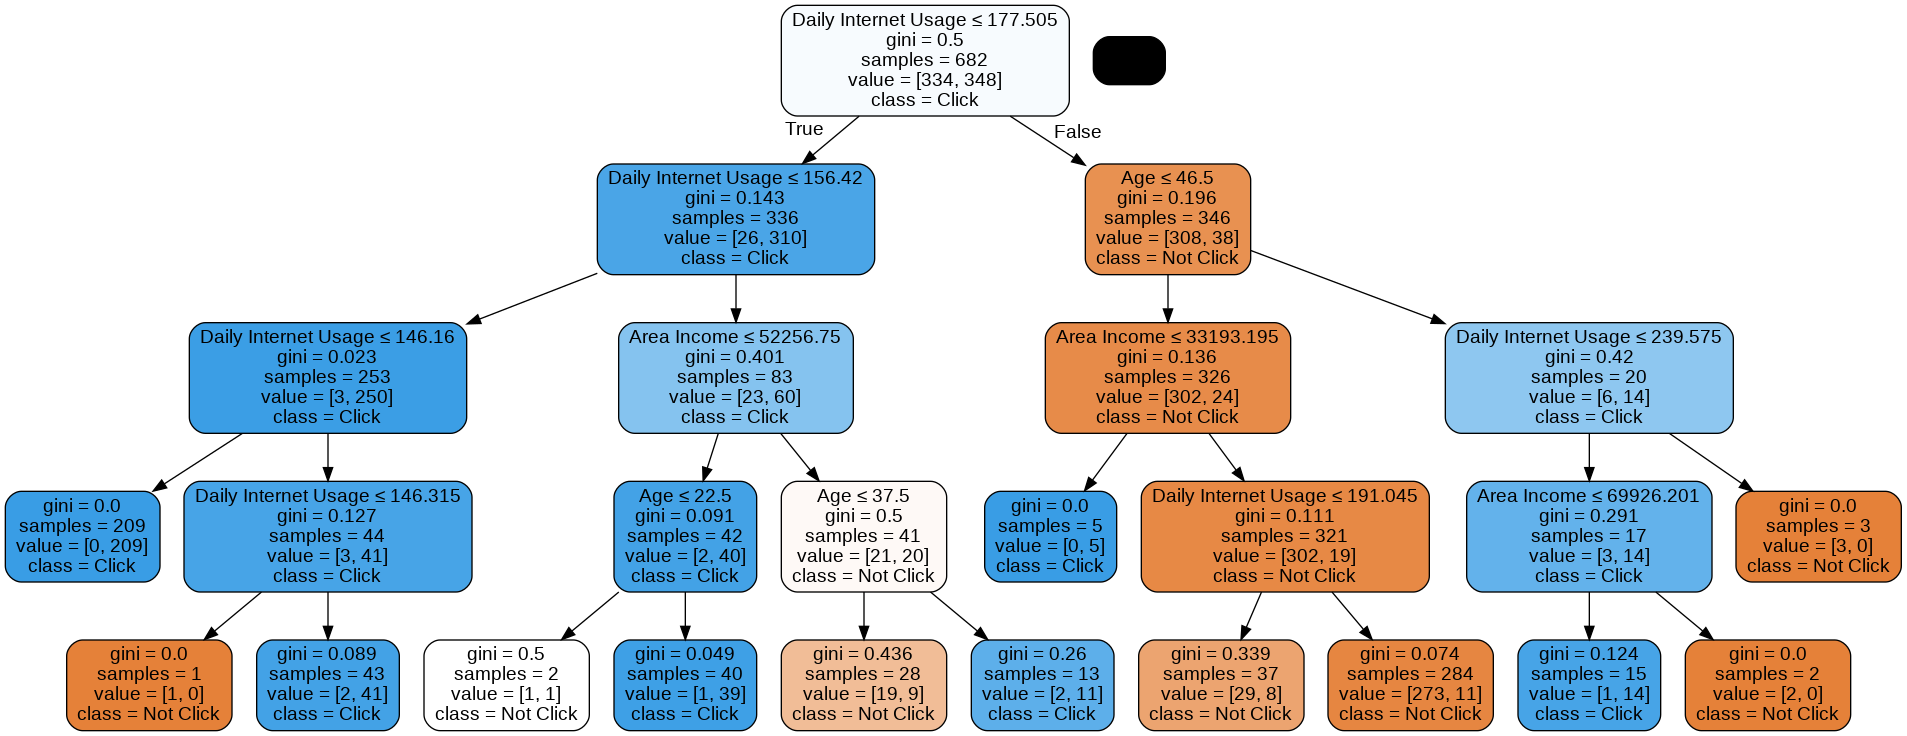

In [ ]:
dot_data = StringIO()
export_graphviz(tre2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = fs2 ,class_names=['Not Click','Click'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Decision Tree 3

In [ ]:
#Set feature and target variable
fs3 = ['Age','Gender','Daily Internet Usage'] #select attribute to use
X3 = nck[fs3]  #set feature
Y3 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train3 , X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=42)

In [ ]:
#decision tree variable
tre3 = DecisionTreeClassifier(max_depth=4)
# give train set to decision tree by 'fit' fuction

tre3 = tre3.fit(X_train3,Y_train3)
#give test set to decision tree by 'predict' fuction
test_r3 = tre3.predict(X_test3)

# show how accurate was the model
print("Accuracy:",metrics.accuracy_score(Y_test3, test_r3))

Accuracy: 0.9010238907849829


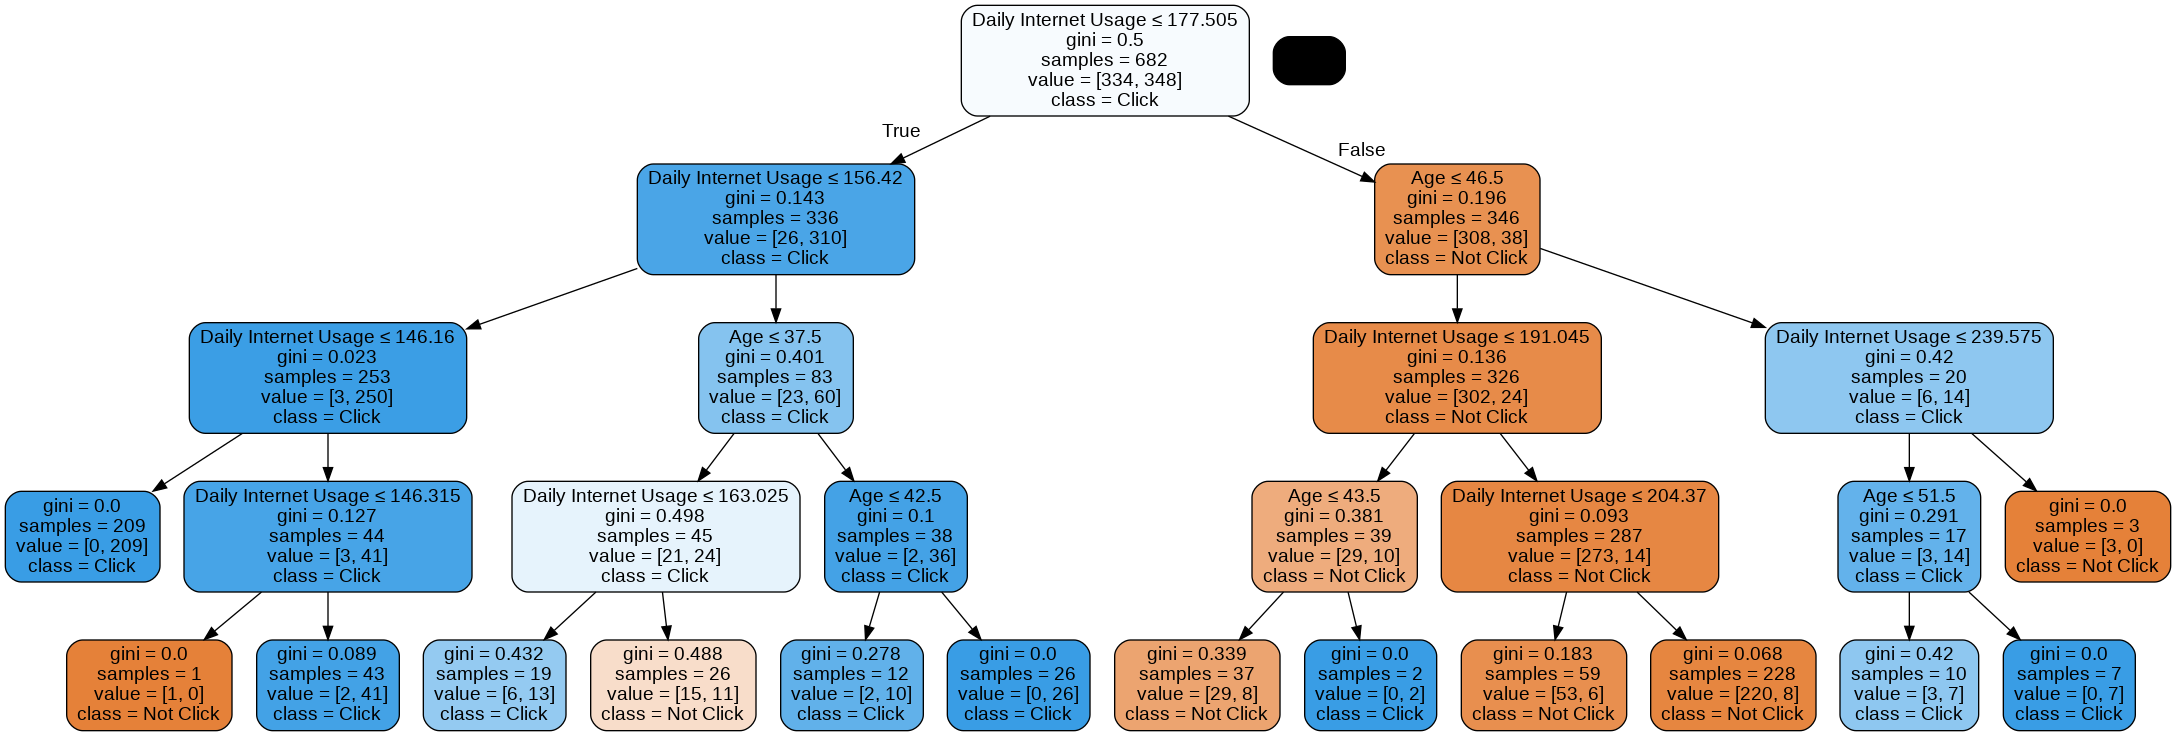

In [ ]:
dot_data = StringIO()
export_graphviz(tre3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = fs3 ,class_names=['Not Click','Click'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Decision Tree 4

In [ ]:
from sklearn.model_selection import train_test_split #import train test spilt function
#Set feature and target variable
fs4 = ['Age','Area Income','Gender'] #select attribute to use
X4 = nck[fs4]  #set feature
Y4 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train4 , X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size=0.3, random_state=42)

In [ ]:
#decision tree variable
tre4 = DecisionTreeClassifier(max_depth=4)
# give train set to decision tree by 'fit' fuction

tre4 = tre4.fit(X_train4,Y_train4)
#give test set to decision tree by 'predict' fuction
test_r4 = tre4.predict(X_test4)

# show how accurate was the model
print("Accuracy:",metrics.accuracy_score(Y_test4, test_r4))

Accuracy: 0.7986348122866894


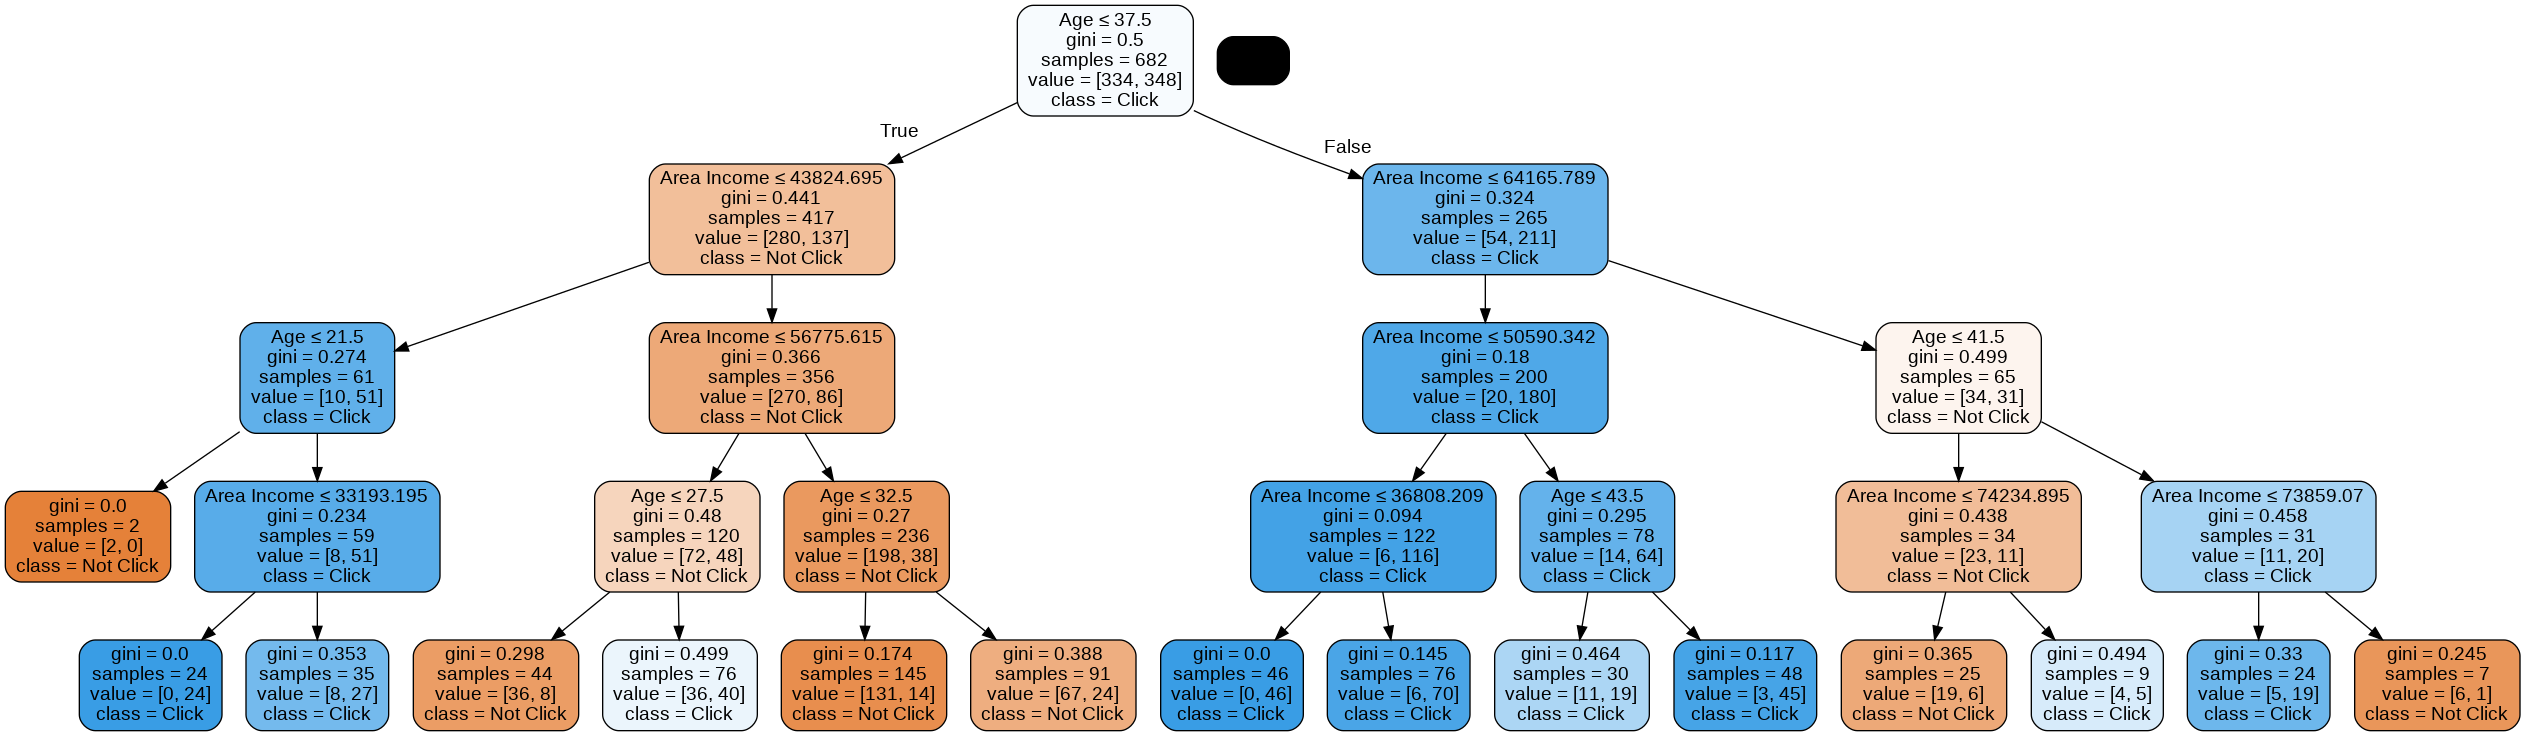

In [ ]:
dot_data = StringIO()
export_graphviz(tre4, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = fs4 ,class_names=['Not Click','Click'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Decision Tree Summary



In [ ]:
#show the accuracy of each model with different selected features
print("Accuracy of the first model with ['Gender','Area Income','Daily Internet Usage']:",metrics.accuracy_score(Y_test1, test_r1))
print("Accuracy of the second model with ['Age','Area Income','Daily Internet Usage']:",metrics.accuracy_score(Y_test2, test_r2))
print("Accuracy of the third model with ['Age','Gender','Daily Internet Usage']:",metrics.accuracy_score(Y_test3, test_r3))
print("Accuracy of the fourth model with ['Age','Area Income','Gender']:",metrics.accuracy_score(Y_test4, test_r4))

Accuracy of the first model with ['Gender','Area Income','Daily Internet Usage']: 0.9044368600682594
Accuracy of the second model with ['Age','Area Income','Daily Internet Usage']: 0.9180887372013652
Accuracy of the third model with ['Age','Gender','Daily Internet Usage']: 0.9010238907849829
Accuracy of the fourth model with ['Age','Area Income','Gender']: 0.7986348122866894


# Naive Bayes Model

Naive Bayes 1

In [ ]:
#Set feature and target variable
fs5 = ['Gender','Income_Group','Internet_Usage_Amount'] #select attribute to use
X5 = nck[fs5]  #set feature
Y5 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train5 , X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size=0.3, random_state=42)

In [ ]:
#import Gaussian Naive Bayes
gs5 = GaussianNB()
#train set with fit
gs5.fit(X_train5, Y_train5)
#test set with pred
test_r5 = gs5.predict(X_test5)
#show accuracy percent of this model
print("Accuracy:",metrics.accuracy_score(Y_test5, test_r5))

Accuracy: 0.8600682593856656


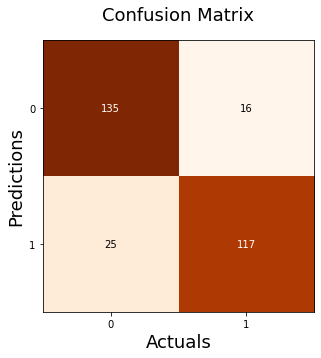

In [ ]:
cm1 = confusion_matrix(Y_test5, test_r5)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm1, figsize=(5, 5), cmap=plt.cm.Oranges)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Naive Bayes 2

In [ ]:
#Set feature and target variable
fs6 = ['Age_Group','Income_Group','Internet_Usage_Amount'] #select attribute to use
X6 = nck[fs6]  #set feature
Y6 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train6 , X_test6, Y_train6, Y_test6 = train_test_split(X6, Y6, test_size=0.3, random_state=42)

In [ ]:
#import Gaussian Naive Bayes
gs6 = GaussianNB()
#train set with fit
gs6.fit(X_train6, Y_train6)
#test set with pred
test_r6 = gs6.predict(X_test6)
#show accuracy percent of this model
print("Accuracy:",metrics.accuracy_score(Y_test6, test_r6))

Accuracy: 0.89419795221843


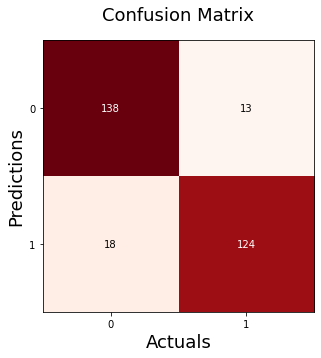

In [ ]:
cm2 = confusion_matrix(Y_test6, test_r6)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm2, figsize=(5, 5), cmap=plt.cm.Reds)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Naive Bayes 3

In [ ]:
#Set feature and target variable
fs7 = ['Age_Group','Gender','Internet_Usage_Amount'] #select attribute to use
X7 = nck[fs7]  #set feature
Y7 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train7 , X_test7, Y_train7, Y_test7 = train_test_split(X7, Y7, test_size=0.3, random_state=42)

In [ ]:
#import Gaussian Naive Bayes
gs7 = GaussianNB()
#train set with fit
gs7.fit(X_train7, Y_train7)
#test set with pred
test_r7 = gs7.predict(X_test7)
#show accuracy percent of this model
print("Accuracy:",metrics.accuracy_score(Y_test7, test_r7))

Accuracy: 0.8839590443686007


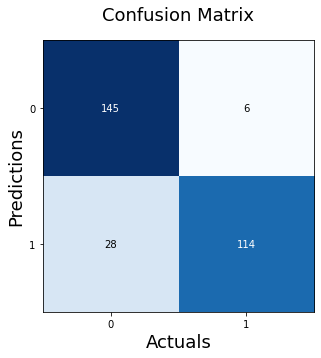

In [ ]:
cm3 = confusion_matrix(Y_test7, test_r7)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm3, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Naive Bayes 4

In [ ]:
#Set feature and target variable
fs8 = ['Age_Group','Income_Group','Gender'] #select attribute to use
X8 = nck[fs8]  #set feature
Y8 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train8 , X_test8, Y_train8, Y_test8 = train_test_split(X8, Y8, test_size=0.3, random_state=42)

In [ ]:
#import Gaussian Naive Bayes
gs8 = GaussianNB()
#train set with fit
gs8.fit(X_train8, Y_train8)
#test set with pred
test_r8 = gs8.predict(X_test8)
#show accuracy percent of this model
print("Accuracy:",metrics.accuracy_score(Y_test8, test_r8))

Accuracy: 0.7849829351535836


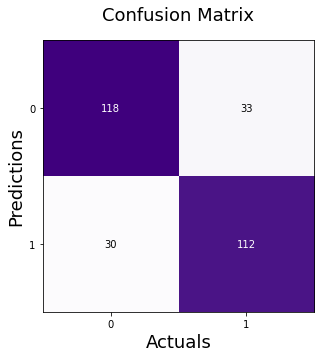

In [ ]:
cm4 = confusion_matrix(Y_test8, test_r8)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm4, figsize=(5, 5), cmap=plt.cm.Purples)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#show the accuracy of each model with different selected features
print("Accuracy of the first model with ['Gender','Income_Group','Internet_Usage_Amount']:",metrics.accuracy_score(Y_test5, test_r5))
print("Accuracy of the second model with ['Age_Group','Income_Group','Internet_Usage_Amount']:",metrics.accuracy_score(Y_test6, test_r6))
print("Accuracy of the third model with ['Age_Group','Gender','Internet_Usage_Amount']:",metrics.accuracy_score(Y_test7, test_r7))
print("Accuracy of the fourth model with ['Age_Group','Income_Group','Gender']:",metrics.accuracy_score(Y_test8, test_r8))

Accuracy of the first model with ['Gender','Income_Group','Internet_Usage_Amount']: 0.8600682593856656
Accuracy of the second model with ['Age_Group','Income_Group','Internet_Usage_Amount']: 0.89419795221843
Accuracy of the third model with ['Age_Group','Gender','Internet_Usage_Amount']: 0.8839590443686007
Accuracy of the fourth model with ['Age_Group','Income_Group','Gender']: 0.7849829351535836


# Histogram-based Gradient Boosting Classifier Model

Histogram-based Gradient Boosting Classifier 1

In [ ]:
#Set feature and target variable
fs9 = ['Age','Income_Group','Internet_Usage_Amount'] #select attribute to use
X9 = nck[fs9]  #set feature
Y9 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train9 , X_test9, Y_train9, Y_test9 = train_test_split(X9, Y9, test_size=0.3, random_state=42)

In [ ]:
hgb1 = HistGradientBoostingClassifier(categorical_features = [False, True, True])
hgb1.fit(X_train9,Y_train9)
hgb_tst1 = hgb1.predict(X_test9)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test9, hgb_tst1))

Accuracy: 0.8873720136518771


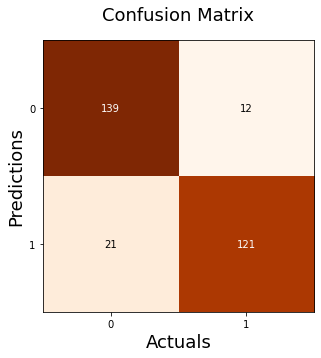

In [ ]:
cm5 = confusion_matrix(Y_test9, hgb_tst1)
fig, ax = plot_confusion_matrix(conf_mat=cm5, figsize=(5, 5), cmap=plt.cm.Oranges)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Histogram-based Gradient Boosting Classifier 2

In [ ]:
#Set feature and target variable
fs10 = ['Age_Group','Area Income','Internet_Usage_Amount'] #select attribute to use
X10 = nck[fs10]  #set feature
Y10 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train10 , X_test10, Y_train10, Y_test10 = train_test_split(X10, Y10, test_size=0.3, random_state=42)

In [ ]:
hgb2 = HistGradientBoostingClassifier(categorical_features = [True, False, True])
hgb2.fit(X_train10,Y_train10)
hgb_tst2 = hgb2.predict(X_test10)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test10, hgb_tst2))

Accuracy: 0.9010238907849829


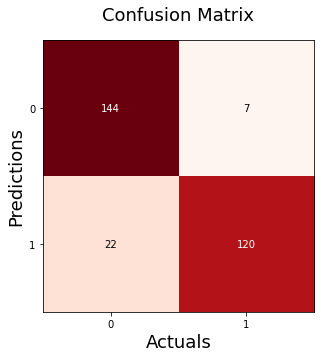

In [ ]:
cm6 = confusion_matrix(Y_test10, hgb_tst2)
fig, ax = plot_confusion_matrix(conf_mat=cm6, figsize=(5, 5), cmap=plt.cm.Reds)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Histogram-based Gradient Boosting Classifier 3



In [ ]:
#Set feature and target variable
fs11 = ['Age_Group','Income_Group','Daily Internet Usage'] #select attribute to use
X11 = nck[fs11]  #set feature
Y11 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train11 , X_test11, Y_train11, Y_test11 = train_test_split(X11, Y11, test_size=0.3, random_state=42)

In [ ]:
hgb3 = HistGradientBoostingClassifier(categorical_features = [True, True, False])
hgb3.fit(X_train11,Y_train11)
hgb_tst3 = hgb3.predict(X_test11)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test11, hgb_tst3))

Accuracy: 0.8976109215017065


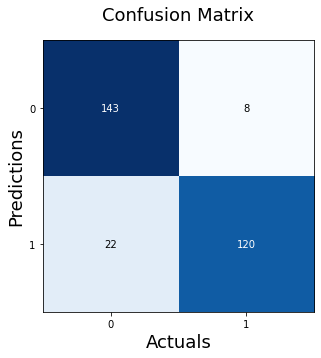

In [ ]:
cm7 = confusion_matrix(Y_test11, hgb_tst3)
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(5, 5), cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Histogram-based Gradient Boosting Classifier 4

In [ ]:
#Set feature and target variable
fs12 = ['Age_Group','Area Income','Daily Internet Usage'] #select attribute to use
X12 = nck[fs12]  #set feature
Y12 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train12 , X_test12, Y_train12, Y_test12 = train_test_split(X12, Y12, test_size=0.3, random_state=42)

In [ ]:
hgb4 = HistGradientBoostingClassifier(categorical_features = [True, False, False])
hgb4.fit(X_train12,Y_train12)
hgb_tst4 = hgb4.predict(X_test12)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test12, hgb_tst4))

Accuracy: 0.8976109215017065


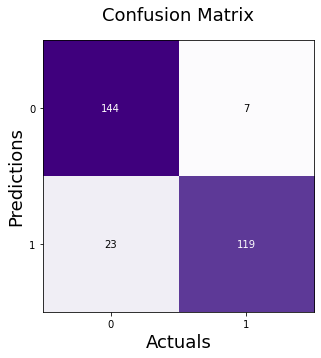

In [ ]:
cm8 = confusion_matrix(Y_test12, hgb_tst4)
fig, ax = plot_confusion_matrix(conf_mat=cm8, figsize=(5, 5), cmap=plt.cm.Purples)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Model 5

In [ ]:
#Set feature and target variable
fs13 = ['Age','Income_Group','Daily Internet Usage'] #select attribute to use
X13 = nck[fs13]  #set feature
Y13 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train13 , X_test13, Y_train13, Y_test13 = train_test_split(X13, Y13, test_size=0.3, random_state=42)

In [ ]:
hgb5 = HistGradientBoostingClassifier(categorical_features = [False, True, False])
hgb5.fit(X_train13,Y_train13)
hgb_tst5 = hgb5.predict(X_test13)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test13, hgb_tst5))

Accuracy: 0.9010238907849829


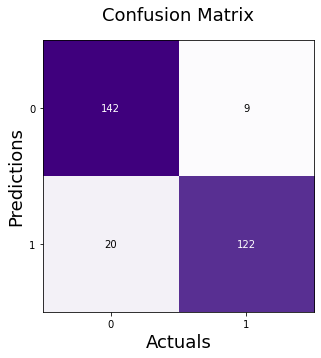

In [ ]:
cm9 = confusion_matrix(Y_test13, hgb_tst5)
fig, ax = plot_confusion_matrix(conf_mat=cm9, figsize=(5, 5), cmap=plt.cm.Purples)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Model 6

In [ ]:
#Set feature and target variable
fs14 = ['Age','Area Income','Internet_Usage_Amount'] #select attribute to use
X14 = nck[fs14]  #set feature
Y14 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train14 , X_test14, Y_train14, Y_test14 = train_test_split(X14, Y14, test_size=0.3, random_state=42)

In [ ]:
#Import HistGradientBoostingClassifier
hgb6 = HistGradientBoostingClassifier(categorical_features = [False, False, True])
#Assign Train set with fit
hgb6.fit(X_train14,Y_train14)
#Assign Test set with predict
hgb_tst6 = hgb6.predict(X_test14)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test14, hgb_tst6))

Accuracy: 0.9044368600682594


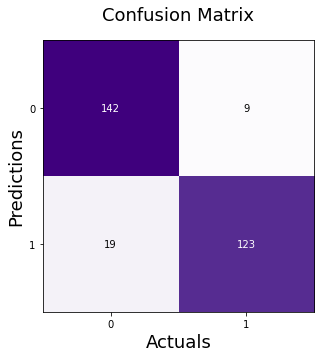

In [ ]:
cm10 = confusion_matrix(Y_test14, hgb_tst6)
fig, ax = plot_confusion_matrix(conf_mat=cm10, figsize=(5, 5), cmap=plt.cm.Purples)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Model 7

In [ ]:
#Set feature and target variable
fs15 = ['Age_Group','Income_Group','Internet_Usage_Amount'] #select attribute to use
X15 = nck[fs15]  #set feature
Y15 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train15 , X_test15, Y_train15, Y_test15 = train_test_split(X15, Y15, test_size=0.3, random_state=42)

In [ ]:
hgb7 = HistGradientBoostingClassifier(categorical_features = [True, True, True])
hgb7.fit(X_train15,Y_train15)
hgb_tst7 = hgb7.predict(X_test15)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test15, hgb_tst7))

Accuracy: 0.8805460750853242


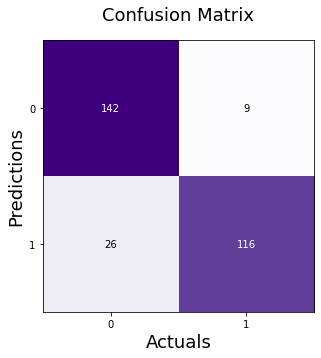

In [ ]:
cm11 = confusion_matrix(Y_test15, hgb_tst7)
fig, ax = plot_confusion_matrix(conf_mat=cm11, figsize=(5, 5), cmap=plt.cm.Purples)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Model 8

In [ ]:
#Set feature and target variable
fs16 = ['Age','Area Income','Daily Internet Usage'] #select attribute to use
X16 = nck[fs16]  #set feature
Y16 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train16 , X_test16, Y_train16, Y_test16 = train_test_split(X16, Y16, test_size=0.3, random_state=42)

In [ ]:
#Import HistGradientBoostingClassifier
hgb8 = HistGradientBoostingClassifier(categorical_features = [False, False, False])
#Assign Train set with fit
hgb8.fit(X_train16,Y_train16)
#Assign test set with pred
hgb_tst8 = hgb8.predict(X_test16)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test16, hgb_tst8))

Accuracy: 0.9215017064846417


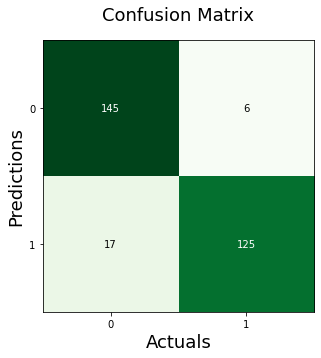

In [ ]:
cm12 = confusion_matrix(Y_test16, hgb_tst8)
fig, ax = plot_confusion_matrix(conf_mat=cm12, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#show the accuracy of each model with different selected features
print("Accuracy of the first model with ['num','cat','cat']:",metrics.accuracy_score(Y_test9, hgb_tst1))
print("Accuracy of the second model with ['cat','num','cat']:",metrics.accuracy_score(Y_test10, hgb_tst2))
print("Accuracy of the third model with ['cat','cat','num']:",metrics.accuracy_score(Y_test11, hgb_tst3))
print("Accuracy of the fourth model with ['cat','num','num']:",metrics.accuracy_score(Y_test12, hgb_tst4))
print("Accuracy of the fifth model with ['num','cat','num']:",metrics.accuracy_score(Y_test13, hgb_tst5))
print("Accuracy of the sixth model with ['num','num','cat']:",metrics.accuracy_score(Y_test14, hgb_tst6))
print('Alternative Features Set Option:')
print("Accuracy of the seventh model with categorical features only:",metrics.accuracy_score(Y_test15, hgb_tst7))
print("Accuracy of the eighth model with numerical features only:",metrics.accuracy_score(Y_test16, hgb_tst8))

Accuracy of the first model with ['num','cat','cat']: 0.8873720136518771
Accuracy of the second model with ['cat','num','cat']: 0.9010238907849829
Accuracy of the third model with ['cat','cat','num']: 0.8976109215017065
Accuracy of the fourth model with ['cat','num','num']: 0.8976109215017065
Accuracy of the fifth model with ['num','cat','num']: 0.9010238907849829
Accuracy of the sixth model with ['num','num','cat']: 0.9044368600682594
Alternative Features Set Option:
Accuracy of the seventh model with categorical features only: 0.8805460750853242
Accuracy of the eighth model with numerical features only: 0.9215017064846417


# Final Classifier

As we have tried plotting with different variable we found out that the best set of feature to be calculated in the classifier was Age, Income and Usage of both numerical and categorical. So, we will be using this set of feature with all the later model experiment

Model 1: Numerical data with Decision Tree

In [ ]:
#Set feature and target variable
selected_features = ['Age','Area Income','Daily Internet Usage'] #select attribute to use
X = nck[fs2]  #set feature
y = nck['Clicked on Ad'] #set target variable
#train and test set
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#decision tree variable
tre = DecisionTreeClassifier(max_depth=4)
# give train set to decision tree by 'fit' fuction

tre = tre.fit(X_train,y_train)
#give test set to decision tree by 'predict' fuction
y_pred = tre.predict(X_test)

# show how accurate was the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9180887372013652


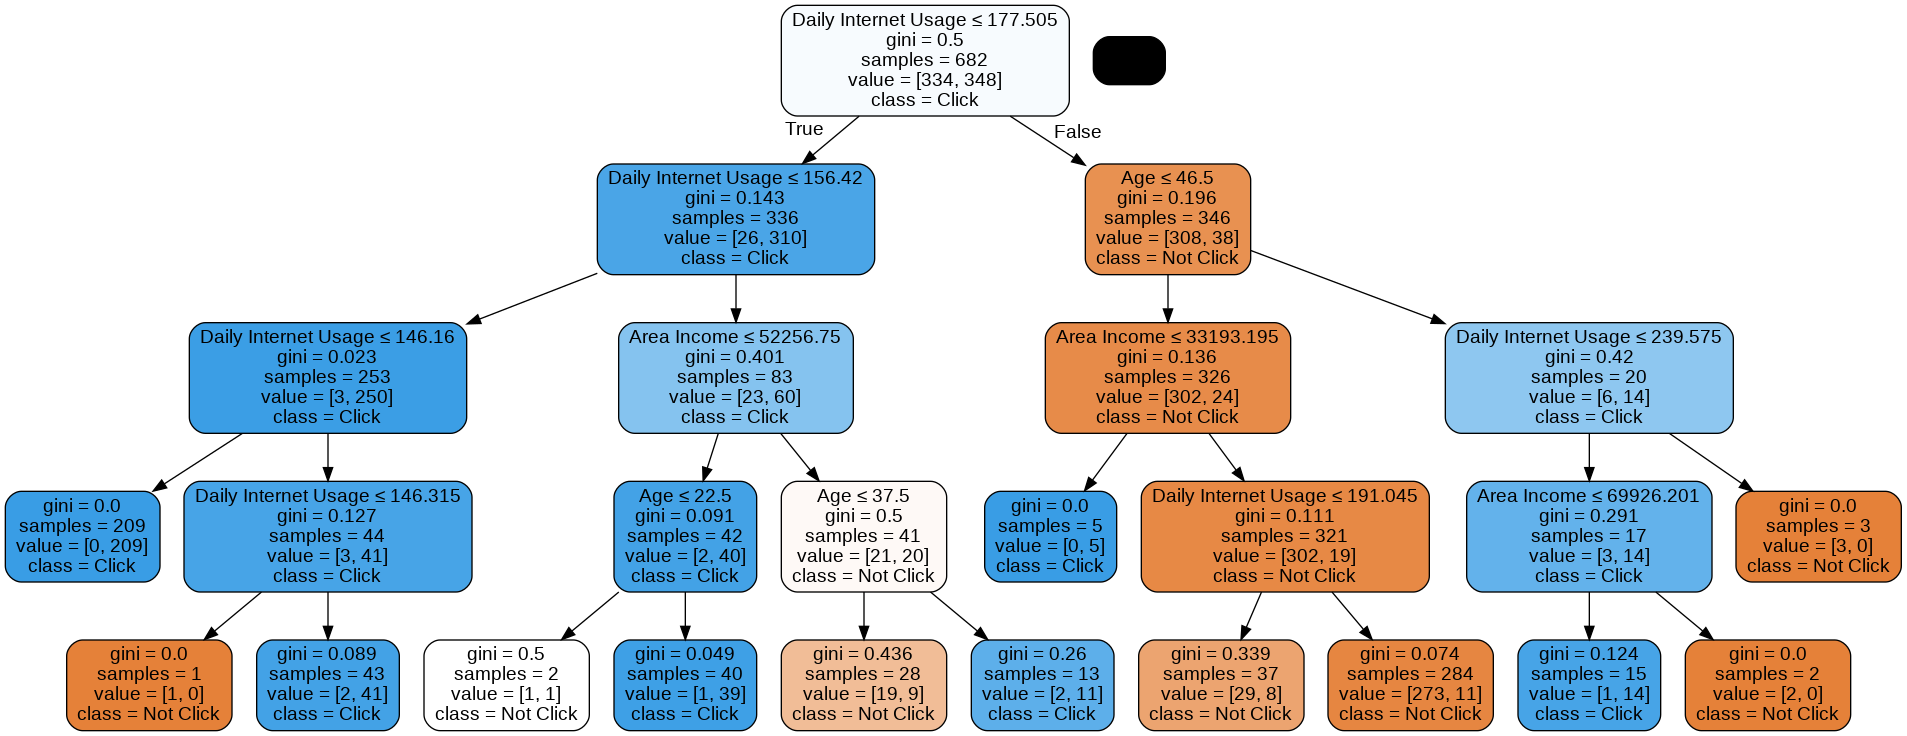

In [ ]:
dot_data = StringIO()
export_graphviz(tre2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = fs2 ,class_names=['Not Click','Click'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Model 2: Categorical Data with Gaussian Naive Bayes

In [ ]:
#Set feature and target variable
selected_features_gnb = ['Age_Group','Income_Group','Internet_Usage_Amount'] #select attribute to use
X = nck[selected_features_gnb]  #set feature
y = nck['Clicked on Ad'] #set target variable
#train and test set
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#import Gaussian Naive Bayes
gnb = GaussianNB()

gnb = gnb.fit(X_train,y_train)
#give test set to decision tree by 'predict' fuction
y_pred = gnb.predict(X_test)

# show how accurate was the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8839590443686007


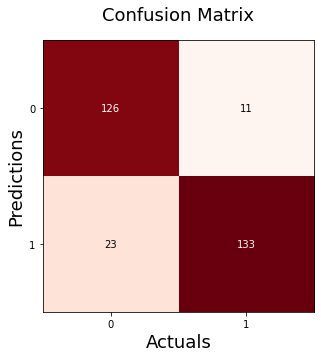

In [ ]:
cm_gnb = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_gnb, figsize=(5, 5), cmap=plt.cm.Reds)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# HistGradientBoostingClassifeir Experiment

Histogram-based Gradient Boosting Classifier 1

In [ ]:
#Set feature and target variable
fs9 = ['Age','Income_Group','Internet_Usage_Amount'] #select attribute to use
X9 = nck[fs9]  #set feature
Y9 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train9 , X_test9, Y_train9, Y_test9 = train_test_split(X9, Y9, test_size=0.3, random_state=1)

In [ ]:
hgb1 = HistGradientBoostingClassifier(categorical_features = [True, True, True])
hgb1.fit(X_train9,Y_train9)
hgb_tst1 = hgb1.predict(X_test9)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test9, hgb_tst1))

Accuracy: 0.8668941979522184


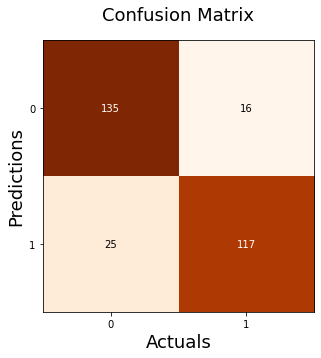

In [ ]:
cm5 = confusion_matrix(Y_test9, hgb_tst1)
fig, ax = plot_confusion_matrix(conf_mat=cm1, figsize=(5, 5), cmap=plt.cm.Oranges)
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Tester

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from pydotplus import graph_from_dot_data

In [ ]:
#Set feature and target variable
fs12 = ['Age_Group','Income_Group','Gender'] #select attribute to use
X12 = nck[fs12]  #set feature
Y12 = nck['Clicked on Ad'] #set target variable
#train and test set
X_train12 , X_test12, Y_train12, Y_test12 = train_test_split(X12, Y12, test_size=0.3, random_state=1)

In [ ]:
clf = GradientBoostingClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train12,Y_train12)
pred = clf.predict(X_test12)

In [ ]:
sub_tree_42 = clf.estimators_[42, 0]

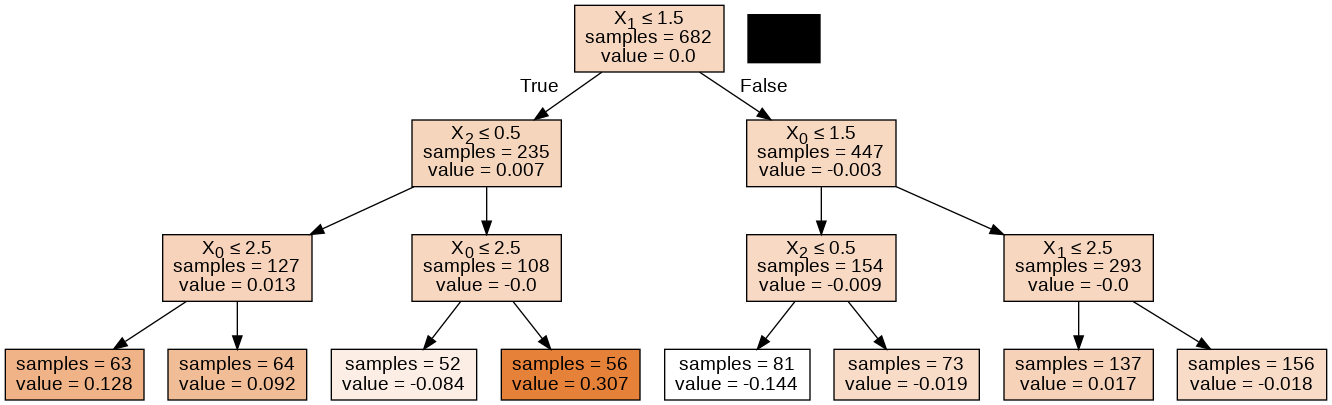

In [ ]:
dot_data = export_graphviz(sub_tree_42,
    out_file = None,
    filled = True,
    special_characters = True,
    proportion = False,
    impurity = False)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())